In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('airfoil_self_noise.dat',sep='\t',header=None)

In [3]:
data.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
data.columns = ['Frequency', 'Angle of attack','Chord length','Free-stream velocity','Suction side displacement thickness','Scaled sound pressure level']

In [5]:
data.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:
data.isnull().sum()

Frequency                              0
Angle of attack                        0
Chord length                           0
Free-stream velocity                   0
Suction side displacement thickness    0
Scaled sound pressure level            0
dtype: int64

In [7]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [8]:
X.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


In [9]:
y.head()

0    126.201
1    125.201
2    125.951
3    127.591
4    127.461
Name: Scaled sound pressure level, dtype: float64

In [10]:
# Devide dataset into train test split
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [12]:
X_train.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


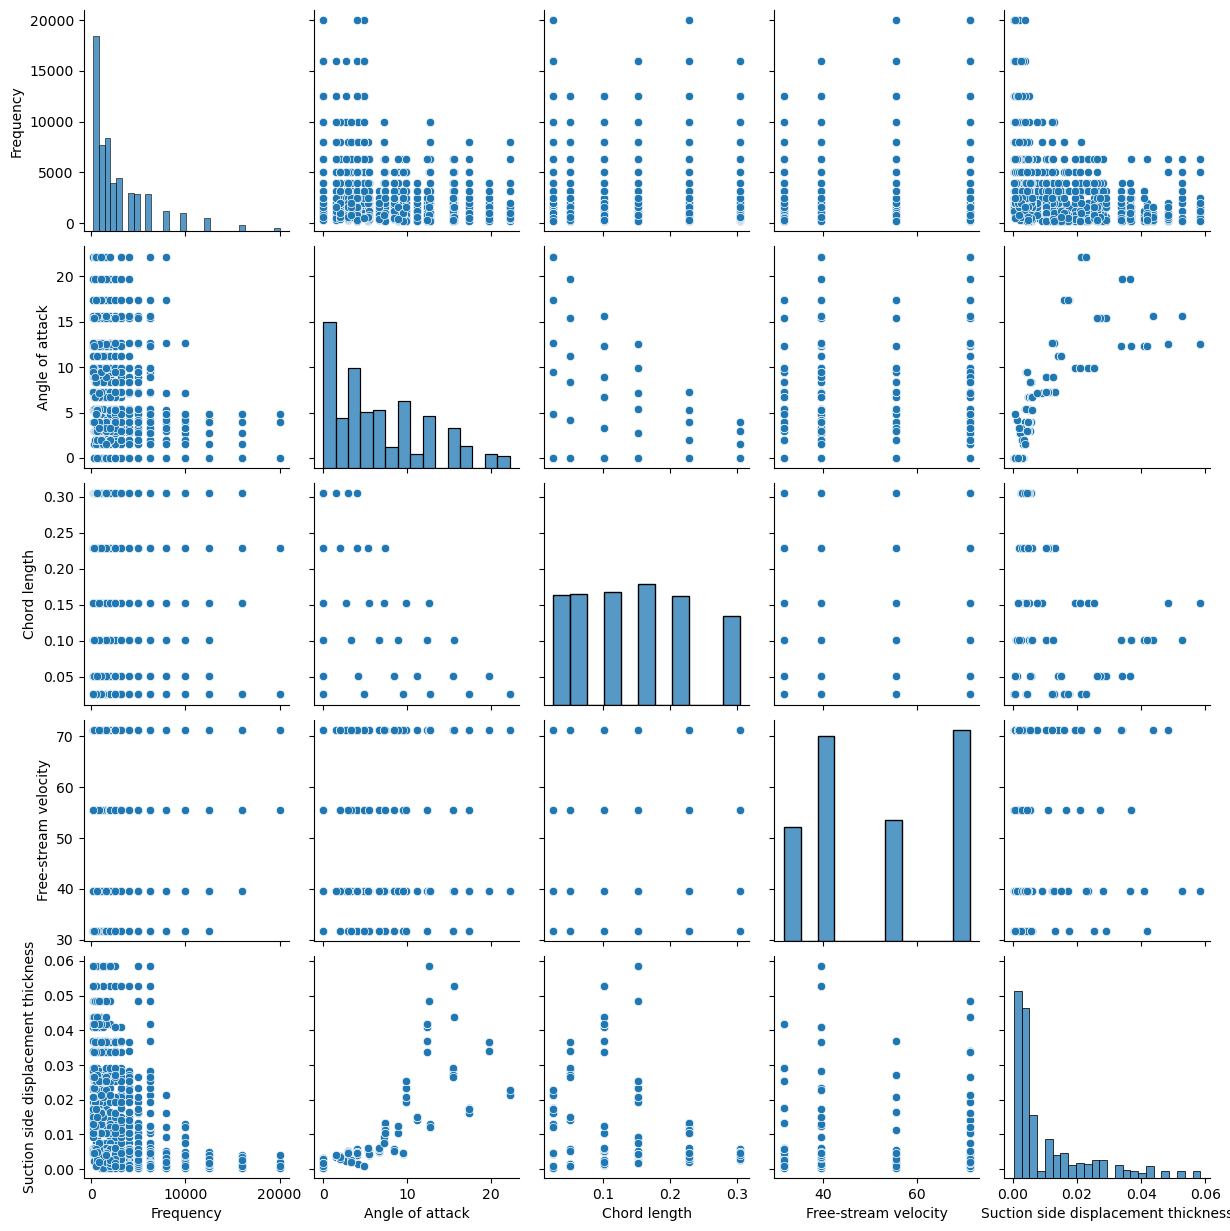

In [13]:
import seaborn as sns
sns.pairplot(X_train)

In [14]:
import matplotlib.pyplot as plt
X_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle of attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
Chord length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free-stream velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Suction side displacement thickness,-0.239878,0.762567,-0.220849,-0.000519,1.000000


<Axes: >

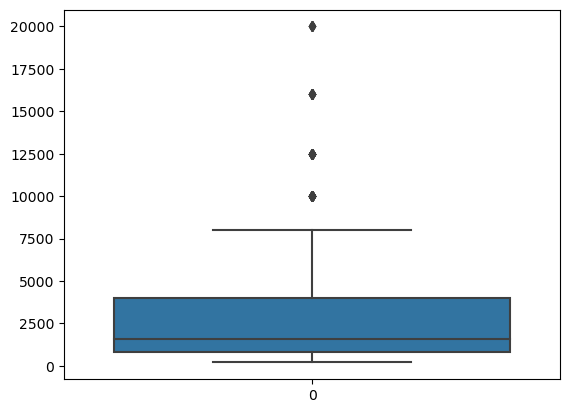

In [15]:
sns.boxplot(X_train['Frequency'])

<Axes: xlabel='Frequency', ylabel='Scaled sound pressure level'>

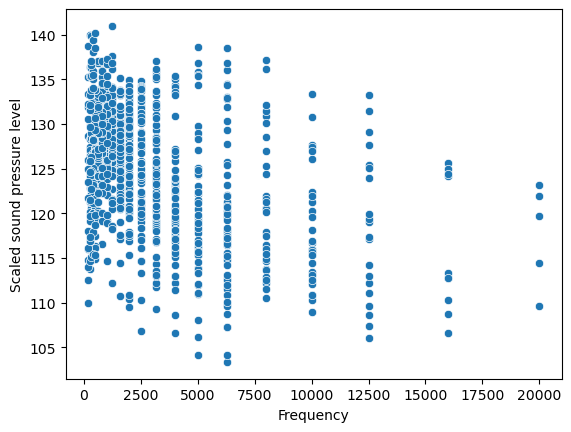

In [16]:
sns.scatterplot(x = X_train['Frequency'], y = y)

In [17]:
data.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [18]:
data['Scaled sound pressure level'].unique()

array([126.201, 125.201, 125.951, ..., 106.604, 106.224, 104.204])

In [19]:
len(data['Scaled sound pressure level'].unique())

1456

<Axes: >

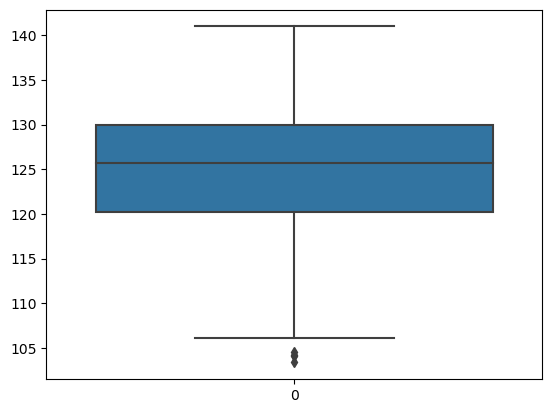

In [20]:
sns.boxplot(data['Scaled sound pressure level'])

In [21]:
# Model building Started

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
from sklearn.metrics import accuracy_score     # This is for classification problem
from sklearn.metrics import mean_absolute_error # This is for regression problem

In [24]:
R_F_Regressor = RandomForestRegressor(n_estimators=100,random_state=42)

In [25]:
R_F_Regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [26]:
# Accuracy

In [27]:
y_pred = R_F_Regressor.predict(X_test)

In [28]:
# Mean absolute error
mae = mean_absolute_error(y_test,y_pred)

In [29]:
print(mae,'Mean Absolute Error')

1.3386089112903248 Mean Absolute Error


In [30]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.9278752746636335

In [31]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = linear_model.predict(X_test)

In [33]:
mae = mean_absolute_error(y_test,y_pred)

In [34]:
print(mae,'Mean Absolute Error')

3.7288137950232945 Mean Absolute Error


In [35]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.5124474986138426